In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [17]:
import numpy as np
import pandas as pd
# import datetime as dt
from datetime import timedelta, datetime

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).scalar()
most_recent_date

'2017-08-23'

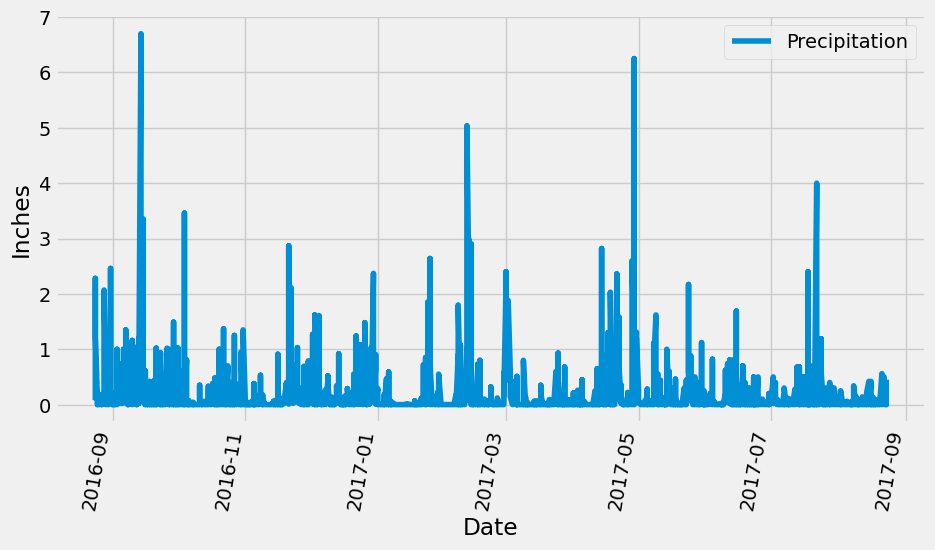

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Convert scalar latest date to datetime object
most_recent_date_dt = datetime.strptime(most_recent_date, '%Y-%m-%d')
# Calculate the date one year from the last date in data set.
one_year_prior = most_recent_date_dt - timedelta(days=365)
# one_year_prior_str = one_year_prior.strftime('%Y-%m-%d')
# Perform a query to retrieve the date and precipitation scores
precip_scores = session.query(measurement.date, measurement.prcp).filter(measurement.date.between(
    one_year_prior, most_recent_date_dt)).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_scores_df = pd.DataFrame(precip_scores, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
    #convert date column to datetime format
precip_scores_df['Date'] = pd.to_datetime(precip_scores_df['Date'])
precip_scores_df_sorted = precip_scores_df.sort_values('Date')
#Remove NaN values from dataset
precip_cleaned_df = precip_scores_df_sorted.dropna()
#Set index as date column for easy plotting
precip_scores_df_final = precip_cleaned_df.set_index("Date")
# Use Pandas Plotting with Matplotlib to plot the data
precip_scores_df_final.plot(figsize=(10, 6))
plt.ylabel('Inches')
plt.xticks(rotation=80)

plt.show()

In [24]:
precip_cleaned_df

,Date,Precipitation
0,2016-08-24,0.08
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15
1875,2016-08-24,1.45
...,...,...
1522,2017-08-22,0.00
1523,2017-08-23,0.08
359,2017-08-23,0.00
1005,2017-08-23,0.00


In [25]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precip_scores_df_final.describe()
summary_stats

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

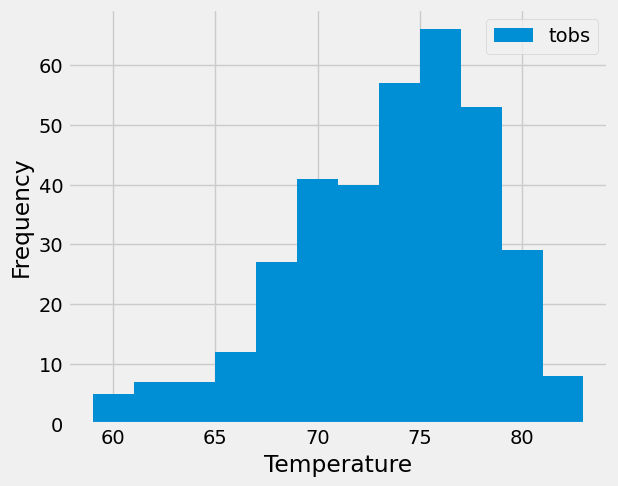

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()